## **Predicting Malignant or Benign Breast Masses**
### Introduction

Our dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of 357 benign and 212 malignant breast masses. The goal of our model is to accurately predict whether or not these breast masses are malignant or benign. This is extremely useful, because this can potentially be more accurate than human pathologists, resulting in lives being saved. In addition to this, human doctors can draw patterns from the results of a study like this.

### Python Libraries

Libraries we used in this kernel:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and Analyzing the Dataset

Before we do feature engineering, we should do some basic analysis of the dataset to check for
any unnecessary features.

In [3]:
# Read in the data
raw_data = pd.read_csv('data.csv')

# Print out the first five rows
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Looking at the columns of the dataset, there is a column named **ID**.
This column likely doesn't contribute to the analysis of breast masses,
so drop the **ID** column.

There is also a classification called **Unnamed: 32** which contains only NAN, so we do not need it.

The rest of the columns provide relevant data regarding breast masses.

In [4]:
# Drop ID from dataset
raw_data = raw_data.drop(columns='id')
raw_data = raw_data.drop(columns='Unnamed: 32')
raw_data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
# Check for missing values
null_count = raw_data.isnull().sum()
null_count

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Data Exploration

Looking at these distributions, it seems that radius, texture, perimeter, smoothness, and symmetry are centrally normally distributed, while the fractal dimension, concavity, concave points, compactness, area mean seem to be normally distributed with a right skew.

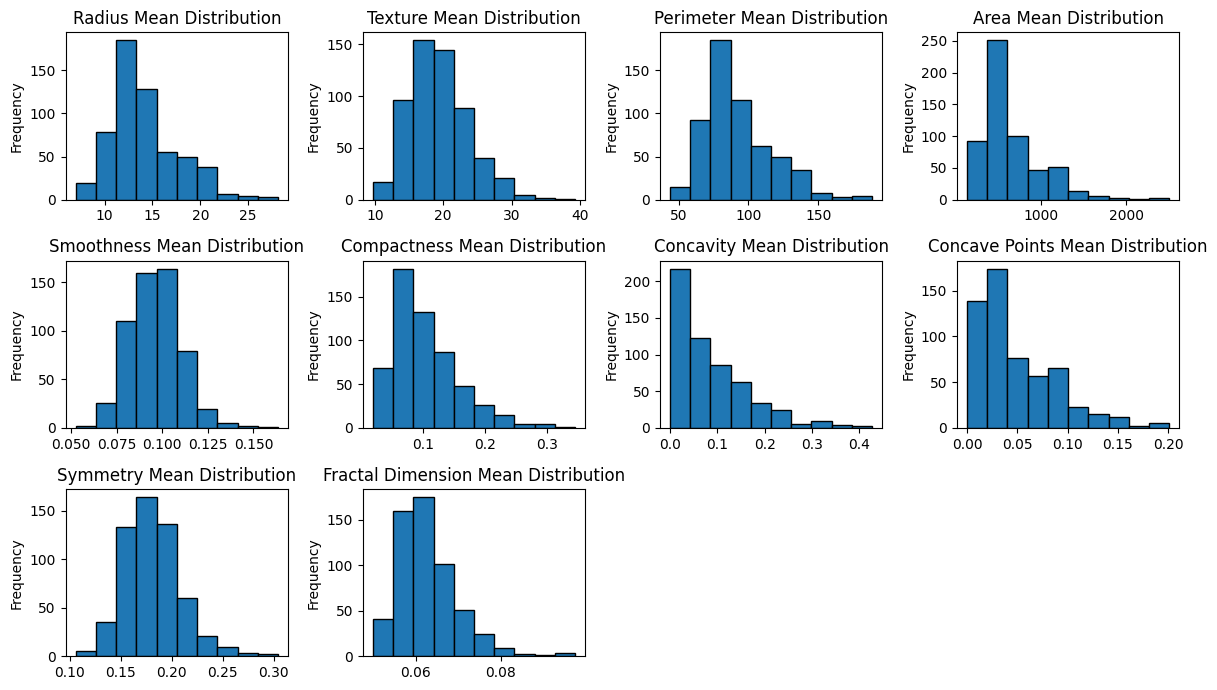

In [6]:
# Explore the radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension features
# by creating a histogram to visualize the distribution

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 7))

radius_dist = raw_data['radius_mean'].plot(kind='hist', edgecolor='black', title='Radius Mean Distribution', ax=axes[0, 0])
texture_dist = raw_data['texture_mean'].plot(kind='hist', edgecolor='black', title='Texture Mean Distribution', ax=axes[0, 1])
perimeter_dist = raw_data['perimeter_mean'].plot(kind='hist', edgecolor='black', title='Perimeter Mean Distribution', ax=axes[0, 2])
area_dist = raw_data['area_mean'].plot(kind='hist', edgecolor='black', title='Area Mean Distribution', ax=axes[0, 3])

smoothness_dist = raw_data['smoothness_mean'].plot(kind='hist', edgecolor='black', title='Smoothness Mean Distribution', ax=axes[1, 0])
compactness_dist = raw_data['compactness_mean'].plot(kind='hist', edgecolor='black', title='Compactness Mean Distribution', ax=axes[1, 1])
concavity_dist = raw_data['concavity_mean'].plot(kind='hist', edgecolor='black', title='Concavity Mean Distribution', ax=axes[1, 2])
concave_points_dist = raw_data['concave points_mean'].plot(kind='hist', edgecolor='black', title='Concave Points Mean Distribution', ax=axes[1, 3])

symmetry_dist = raw_data['symmetry_mean'].plot(kind='hist', edgecolor='black', title='Symmetry Mean Distribution', ax=axes[2, 0])
fractal_dimen7ion_dist = raw_data['fractal_dimension_mean'].plot(kind='hist', edgecolor='black', title='Fractal Dimension Mean Distribution', ax=axes[2, 1])
axes[2, 2].axis('off')
axes[2, 3].axis('off')


plt.tight_layout()
plt.show()

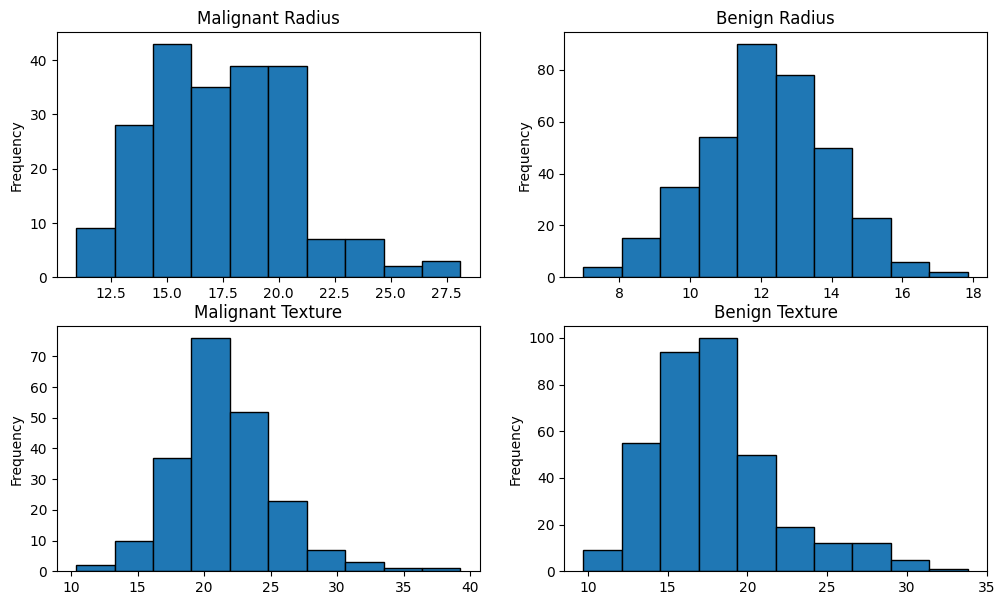

In [7]:
# plot radius and texture for benign and malignant tumors
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
malignant_radius = (raw_data[raw_data['diagnosis'] == 'M']['radius_mean']).plot(kind='hist', edgecolor='black', title='Malignant Radius', ax=axes[0, 0])
benign_radius = (raw_data[raw_data['diagnosis'] == 'B']['radius_mean']).plot(kind='hist', edgecolor='black', title='Benign Radius', ax=axes[0, 1])
malignant_texture = (raw_data[raw_data['diagnosis'] == 'M']['texture_mean']).plot(kind='hist', edgecolor='black', title='Malignant Texture', ax=axes[1, 0])
benign_texture = (raw_data[raw_data['diagnosis'] == 'B']['texture_mean']).plot(kind='hist', edgecolor='black', title='Benign Texture', ax=axes[1, 1])

In [8]:
# Analyzing the difference in mean feature values for malignant versus benign patients' cell nuvlei in breast mass
grouped_data = raw_data.groupby('diagnosis')
mean_values_by_group = grouped_data.mean()
stdvs_by_group = grouped_data.std()
display(mean_values_by_group)
display(stdvs_by_group)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
M,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553


When looking at the difference in means and distributions for these patients, we notice that there seems to be a significant difference in the means, between the benign group and malignant group. 

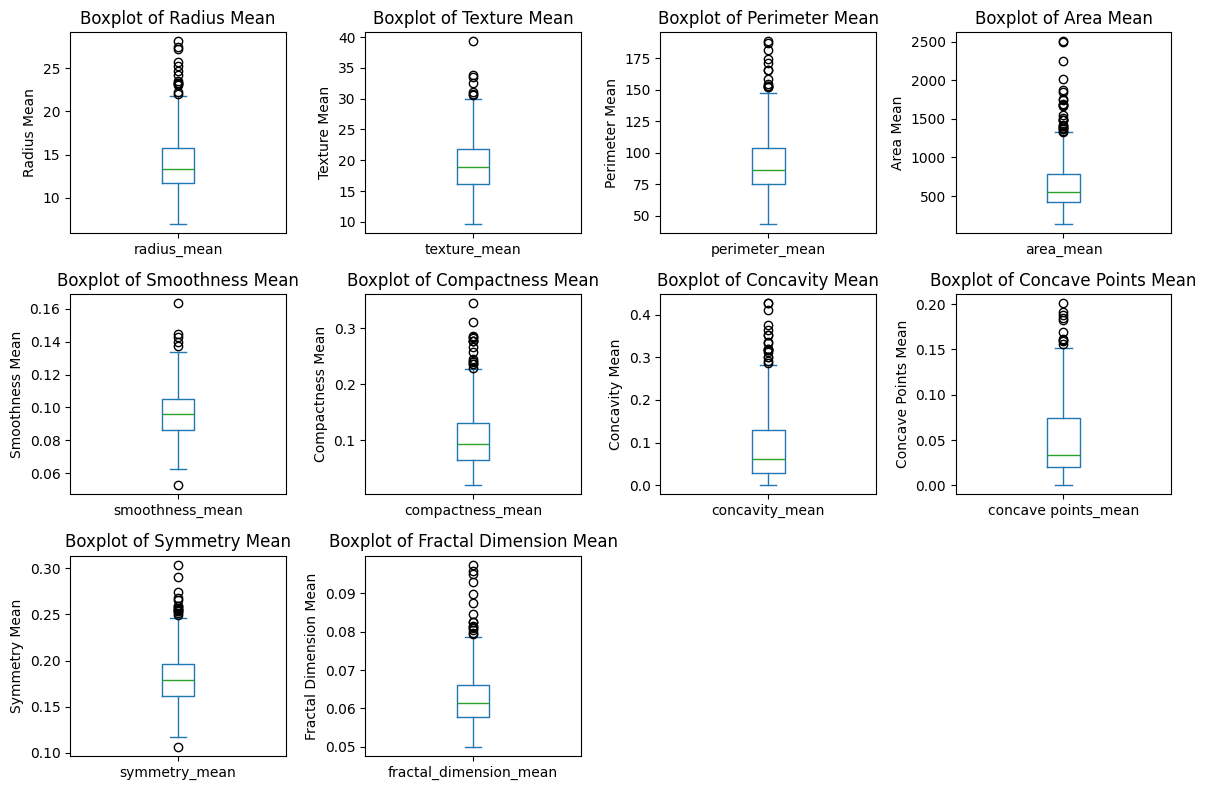

In [9]:
# Check for outliers for radius
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

radius_dist = raw_data['radius_mean'].plot.box(ax=axes[0, 0], title='Boxplot of Radius Mean', ylabel='Radius Mean')
texture_dist = raw_data['texture_mean'].plot.box(ax=axes[0, 1], title='Boxplot of Texture Mean', ylabel='Texture Mean')
perimeter_dist = raw_data['perimeter_mean'].plot.box(ax=axes[0, 2], title='Boxplot of Perimeter Mean', ylabel='Perimeter Mean')
area_dist = raw_data['area_mean'].plot.box(ax=axes[0, 3], title='Boxplot of Area Mean', ylabel='Area Mean')

smoothness_dist = raw_data['smoothness_mean'].plot.box(ax=axes[1, 0], title='Boxplot of Smoothness Mean', ylabel='Smoothness Mean')
compactness_dist = raw_data['compactness_mean'].plot.box(ax=axes[1, 1], title='Boxplot of Compactness Mean', ylabel='Compactness Mean')
concavity_dist = raw_data['concavity_mean'].plot.box(ax=axes[1, 2], title='Boxplot of Concavity Mean', ylabel='Concavity Mean')
concave_points_dist = raw_data['concave points_mean'].plot.box(ax=axes[1, 3], title='Boxplot of Concave Points Mean', ylabel='Concave Points Mean')

symmetry_dist = raw_data['symmetry_mean'].plot.box(ax=axes[2, 0], title='Boxplot of Symmetry Mean', ylabel='Symmetry Mean')
fractal_dimension_dist = raw_data['fractal_dimension_mean'].plot.box(ax=axes[2, 1], title='Boxplot of Fractal Dimension Mean', ylabel='Fractal Dimension Mean')
axes[2, 2].axis('off')
axes[2, 3].axis('off')

plt.tight_layout()
plt.show()

As can be seen in the box plots, there are a few features with clear outliers. The Texture Mean box plot and the Smoothness Mean box plot have a data point which are clearly higher than all other features. We can investigate this more with some anomaly detection.

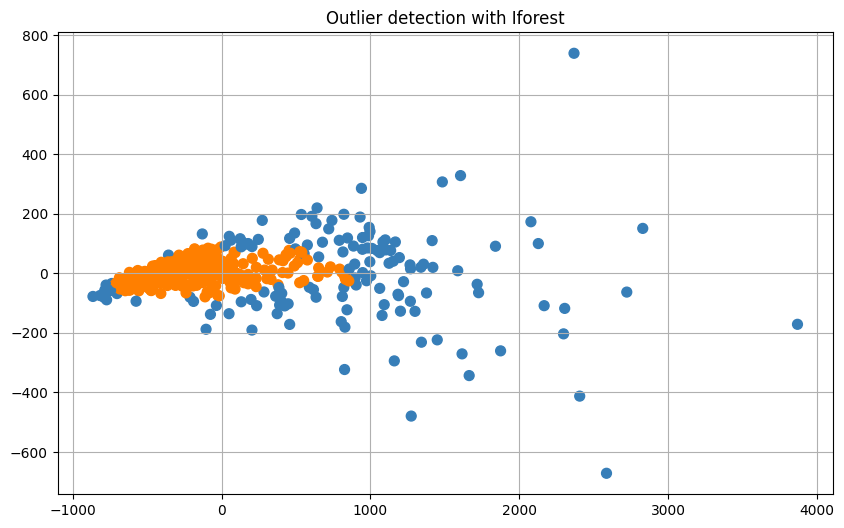

In [10]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

labels = raw_data.iloc[:, 0]
feature_data = raw_data.drop(raw_data.columns[0], axis=1)

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(feature_data)

outliers_fraction = 0.25

# ocsvm = OneClassSVM(kernel='rbf', nu=outliers_fraction)
# y_pred = ocsvm.fit_predict(data_reduced)

iforest = IsolationForest(contamination=outliers_fraction)
y_pred = iforest.fit_predict(data_reduced)

plt.figure(figsize=(10, 6))
colors = np.array(['#377eb8', '#ff7f00'])  # Color for normal points and outliers
# The labels from OneClassSVM are -1 for outliers and 1 for inliers
vectorizer = np.vectorize(lambda x: colors[int(x > 0)])
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], s=50, color=vectorizer(y_pred))
plt.title('Outlier detection with Iforest')
# plt.title('Outlier detection with One Class SVM')
plt.grid(True)
plt.show()

### Feature Engineering

The first thing we want to do is normalize the feature values so that they can be compared to each other
at the same scale.

In [11]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
normalized_data = scaler.fit_transform(feature_data)
normalized_df = pd.DataFrame(normalized_data, columns = feature_data.columns)
normalized_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


We can also feature engineer some values to try to create better features for the model to work with.

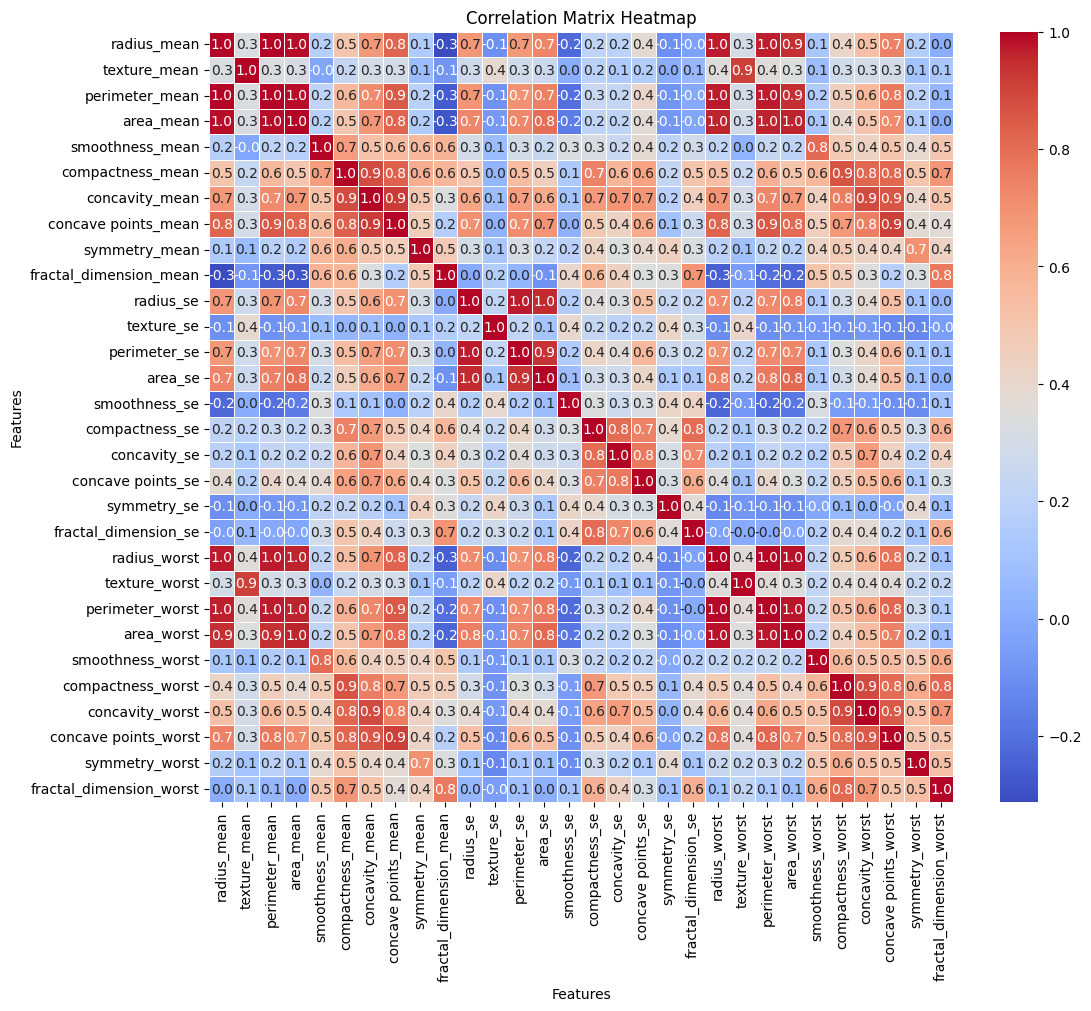

In [12]:
corr_matrix = normalized_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

In [13]:
corr_unstacked = corr_matrix.unstack().reset_index()
corr_unstacked.columns = ['feature_1', 'feature_2', 'correlation']

# Filter out the diagonal elements (correlation of each feature with itself)
corr_unstacked = corr_unstacked[corr_unstacked['feature_1'] != corr_unstacked['feature_2']]

# Sort the DataFrame by the absolute value of correlation in descending order
corr_unstacked = corr_unstacked.reindex(
    corr_unstacked['correlation'].abs().sort_values(ascending=False).index
)

# Print the largest correlation values
print(corr_unstacked.head(30))

           feature_1        feature_2  correlation
60    perimeter_mean      radius_mean     0.997855
2        radius_mean   perimeter_mean     0.997855
680  perimeter_worst     radius_worst     0.993708
622     radius_worst  perimeter_worst     0.993708
3        radius_mean        area_mean     0.987357
90         area_mean      radius_mean     0.987357
92         area_mean   perimeter_mean     0.986507
63    perimeter_mean        area_mean     0.986507
623     radius_worst       area_worst     0.984015
710       area_worst     radius_worst     0.984015
683  perimeter_worst       area_worst     0.977578
712       area_worst  perimeter_worst     0.977578
370     perimeter_se        radius_se     0.972794
312        radius_se     perimeter_se     0.972794
662  perimeter_worst   perimeter_mean     0.970387
82    perimeter_mean  perimeter_worst     0.970387
600     radius_worst      radius_mean     0.969539
20       radius_mean     radius_worst     0.969539
80    perimeter_mean     radius

This displays the most correlated features. Based on the correlation matrix, it seems that there are many features in the dataset which are highly correlated, based on this, we believe that because radius, area, and perimeter are highly correlated we only need to choose one of these values. Because radius is directly used to calculate area, and perimeter and radius are the highest correlated features, we have decided to keep radius and drop the other two features.

In [14]:
# Drop the highly correlated features, and keep radius as it is used in the calculation of perimeter and area
columns_to_drop = [col for col in raw_data.columns if 'perimeter' in col or 'area' in col]
eng_data = feature_data.drop(columns=columns_to_drop)
eng_data

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,...,0.03003,0.006193,25.380,17.33,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,...,0.01389,0.003532,24.990,23.41,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,...,0.02250,0.004571,23.570,25.53,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,...,0.05963,0.009208,14.910,26.50,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,...,0.01756,0.005115,22.540,16.67,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,...,0.01114,0.004239,25.450,26.40,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,...,0.01898,0.002498,23.690,38.25,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,...,0.01318,0.003892,18.980,34.12,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,...,0.02324,0.006185,25.740,39.42,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Random Forest Classifier
Due to the fact that that dataset showed a high degree of separation when comparing means of the various features, and due to the fact that this is a binary classification problem, we believe that a decision tree algorithm like random forests would be ideal.

In [15]:
# Now we will tune the hyperparameters of the Random Forest Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def tune_hyperparameters(eng_data):
    # To start we will simply do a 80 20 split on the dataset
    X_train, X_test, y_train, y_test = train_test_split(eng_data, labels, test_size=0.2, random_state=42)

    # Define the hyperparameters to tune
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_features': [5, 10, 15, 20, 24],
        'max_depth': [10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Train a Random Forest Classifier
    rf = RandomForestClassifier()

    # Use GridSearchCV to tune the hyperparameters
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters
    print("These are the best params found: ", grid_search.best_params_)
    print("This is the grid_search.best_score_", grid_search.best_score_)
    return grid_search.best_score_


rf_best_score = tune_hyperparameters(eng_data)

These are the best params found:  {'max_depth': 40, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
This is the grid_search.best_score_ 0.9670329670329669


### SVM Classifier
Next, we will look at an SVM model (Support vector machine) and determining how accurately it is able to split malignant cells and benign cells. We will use an SVM due to the binary classification nature of this problem, and include tune this SVM using different hyperparameters. FInally, we will use a Grid Search to iterate through all of the combinations, and output the optimal SVM's parameters, estimators, and accuracy.

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(eng_data, labels, test_size=0.2, random_state=42)

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')

# Now we will tune the hyperparameters of the SVM model
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf', 'linear', 'poly']}

grid = GridSearchCV(SVC(), param_grid, verbose=3, cv=5, n_jobs=-1)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)

accuracy_svm_tuned = accuracy_score(y_test, grid_predictions)

print(f'Tuned SVM Accuracy: {accuracy_svm_tuned}')

SVM Accuracy: 0.9473684210526315
Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.934 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.945 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.890 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=   0.0s
[CV 2/5] END .

### Neural Network
Now we will look at the final model, a Neural Network. We will be using and tuning an MLP model (multi-layer perception model). We will do this following the model from class that helps us solve a binary classification problem, using the 3 different activation functions of logistic, tanh, and relu. Once again we must use a grid search to output the best parameters and score.

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(eng_data, labels, test_size=0.2)

# Create an instance of MLPClassifier
mlp = MLPClassifier(max_iter=200) 

# Define the hyperparameter grid for the MLP classifier
param_grid_mlp = {
    'mlp__hidden_layer_sizes': [(30,), (40,), (50,), (60,)],
    'mlp__activation': ['logistic', 'tanh', 'relu']
}

# Create a pipeline with the StandardScaler and MLPClassifier
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])

# Use GridSearchCV to tune the hyperparameters
grid_search_mlp = GridSearchCV(mlp_pipeline, param_grid=param_grid_mlp, cv=5, n_jobs=-1)

grid_search_mlp.fit(X_train, y_train)

# Print the best hyperparameters
print("Here are the best parameters: ", grid_search_mlp.best_params_)
print("This was the best score: ", grid_search_mlp.best_score_)
mlp_best_score = grid_search_mlp.best_score_


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converge

Here are the best parameters:  {'mlp__activation': 'relu', 'mlp__hidden_layer_sizes': (60,)}
This was the best score:  0.9824175824175825


/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.9670329670329669, 0.9824561403508771, 0.9824175824175825]


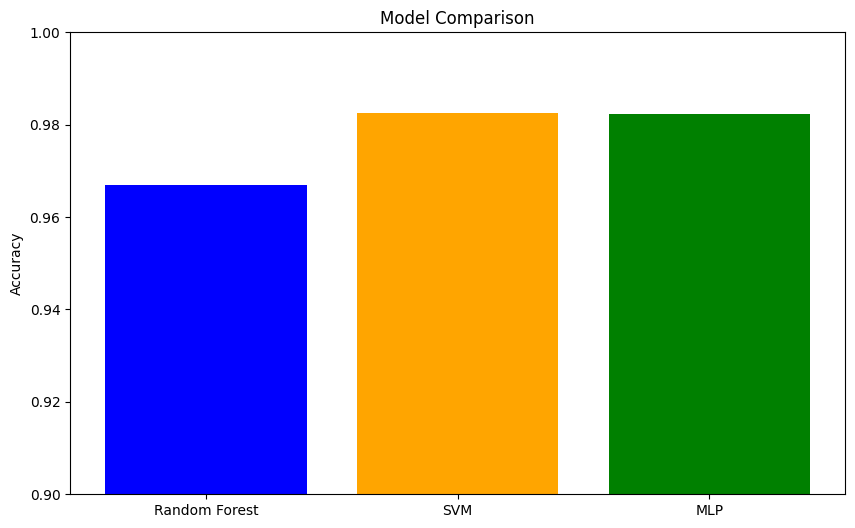

In [20]:
# Here is a plot that compares the accuracy of the three models
plt.figure(figsize=(10, 6))
models = ['Random Forest', 'SVM', 'MLP']
scores = [rf_best_score, accuracy_svm_tuned, mlp_best_score]
print(scores)
plt.bar(models, scores, color=['blue', 'orange', 'green'])
plt.ylim(0.9, 1)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

### Conclusion

We found that the tuned SVM had the best accuracy of 98.245% out of all the models we trained, and random forests had the lowest accuracy of 96.67%. While our initial hypothesis was incorrect, we believe that the reason for this was that the random forest model overfit due to the larger amount of features. SVM and MLP are better at handling feature dense datasets, and hence they seemed to perform better. Additionally, because we noticed that the SVM performed best with a poly transformation on the dataset, it is likely that the boundaries in the dataset were non-liner, hence causing a decrease in performance in RF performance.